# Predicting Median House Values

 ## Data set Attributes

 The data set contains information about houses in Boston, Massachusetts. The data set was collected by the U.S. Census Service and first published by Harrison and Rubenfeld in 1978.

 It contains the following variables:
* **crim:** per capita crime rate by town
* **zn:** proportion of residential land zoned for lots over 25,000 sq. ft
* **indus:** proportion of non-retail business acres per town
* **chas:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **nox:** nitric oxide concentration (parts per 10 million)
* **rm:** average number of rooms per dwelling
* **age:** proportion of owner-occupied units built prior to 1940
* **dis:** weighted distances to five boston employment centers
* **rad:** index of accessibility to radial highways
* **tax:** full-value property tax rate per \$10,000
* **ptratio:** pupil-teacher ratio by town
* **b:** 1000(bk — 0.63)², where bk is the proportion of [people of African American descent] by town
* **lstat:** percentage of lower status of the population
* **medv:** median value of owner-occupied homes in $1000s


*Harrison, David, and Daniel L. Rubinfeld, Hedonic Housing Prices and the Demand for Clean Air, Journal of Environmental Economics and Management, Volume 5, (1978), 81-102. Original data.*


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the median value based on the 'lm' and 'lstat` variables.


In [72]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [73]:
# Read in the data set
data = pd.read_csv('boston.csv')


In [74]:
# Clean and pre-process the data if neccessary

data.head()  # Display the first few rows of the dataset


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [75]:
data.info()  # Get information about data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


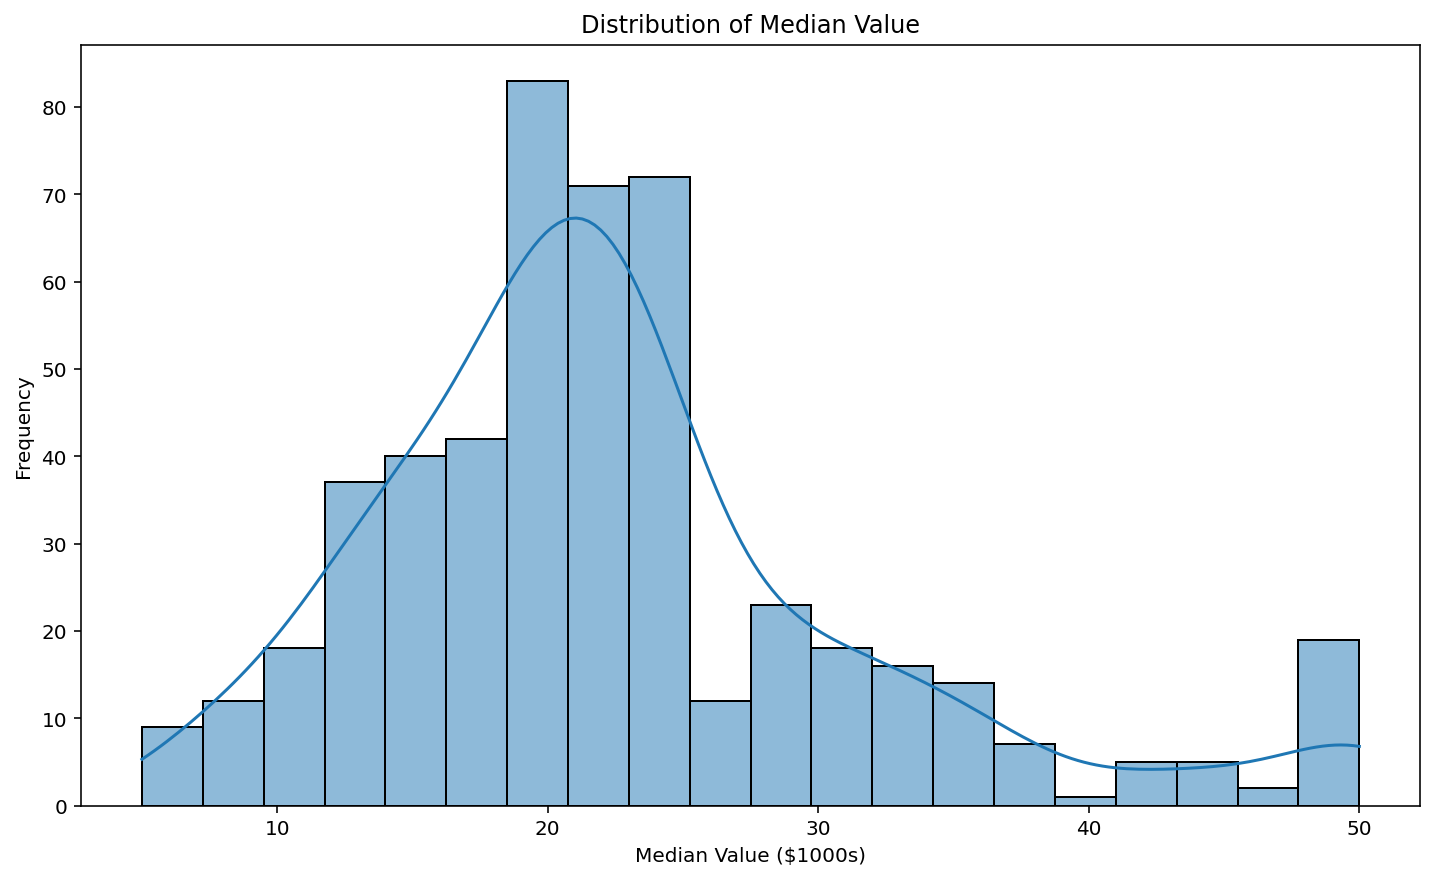

In [76]:
# Explore the data with visualisations such as histograms and correlation matrices
sns.histplot(data['medv'], bins=20, kde=True)
plt.title('Distribution of Median Value')
plt.xlabel('Median Value ($1000s)')
plt.ylabel('Frequency')
plt.show()



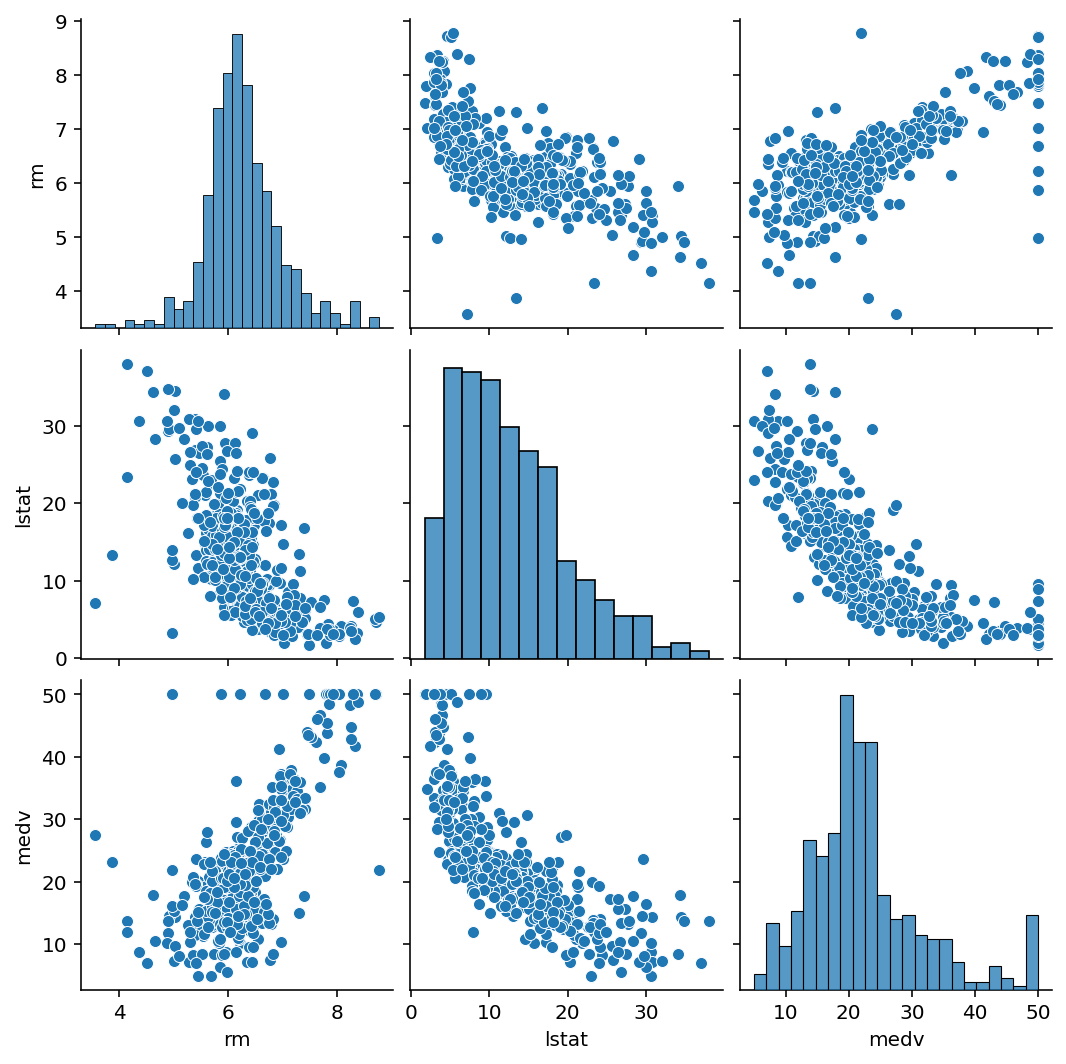

In [77]:
sns.pairplot(data[['rm', 'lstat', 'medv']])
plt.show()


In [78]:
# Split the independent variables from the dependent variable
X = data[['rm', 'lstat']]
y = data['medv']


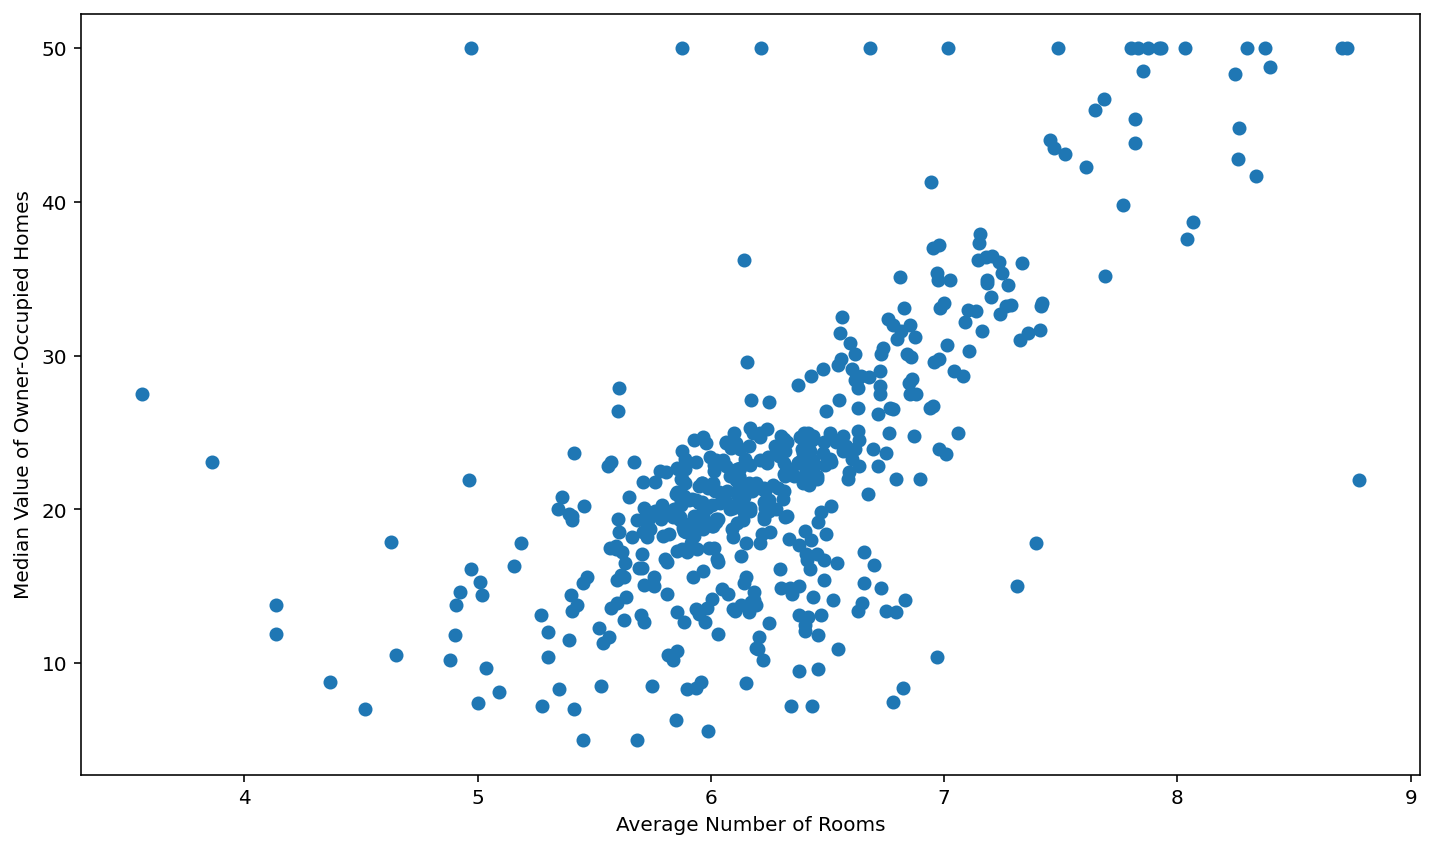

In [79]:
# Explore relationships between the independent and dependent variables
plt.scatter(X['rm'], y)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Value of Owner-Occupied Homes')
plt.show()




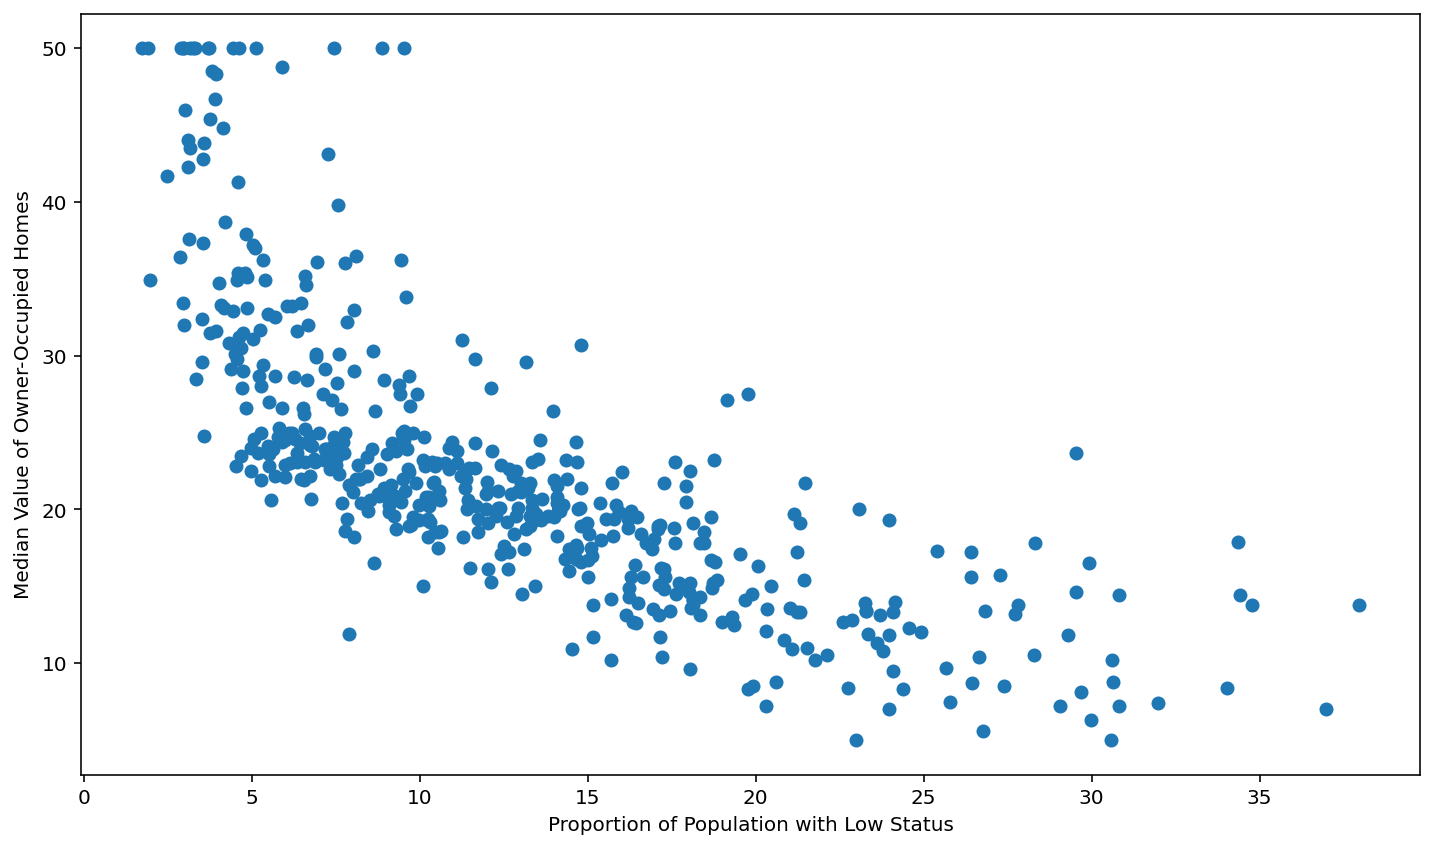

In [80]:
plt.scatter(X['lstat'], y)
plt.xlabel('Proportion of Population with Low Status')
plt.ylabel('Median Value of Owner-Occupied Homes')
plt.show()

In [81]:
# Create a training and test set with a 75:25 split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [82]:
# Build a multiple linear regression model using 'rm' and 'lstat'
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [83]:
# Print the model intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -0.604710743507745
Coefficients: [ 5.01785312 -0.67451869]


In [84]:
# Generate predictions for the test set
y_pred = model.predict(X_test)

In [85]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 35.19229684718286
Root Mean Squared Error: 5.9323095710846765


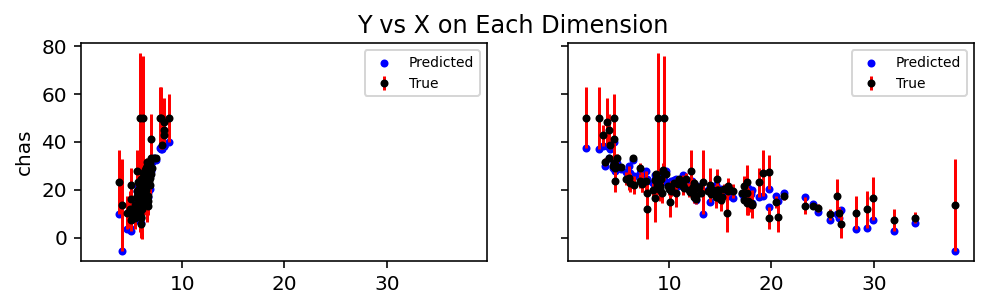

In [86]:
# Generate predictions
predictions = model.predict(X_test)

# Plot Errors
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(8,2))
fig.suptitle("Y vs X on Each Dimension")
ax[0].set_ylabel(data.columns[3])

# Calculate the absolute error for the first prediction column
error_bar_values = np.abs(y_test.values.flatten() - predictions.flatten())


# Plot data, predicted values, and error bars
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test.iloc[:, i], y_test, yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(X_test.iloc[:, i], predictions, c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

plt.show()

In [87]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 35.19229684718286
Root Mean Squared Error: 5.9323095710846765


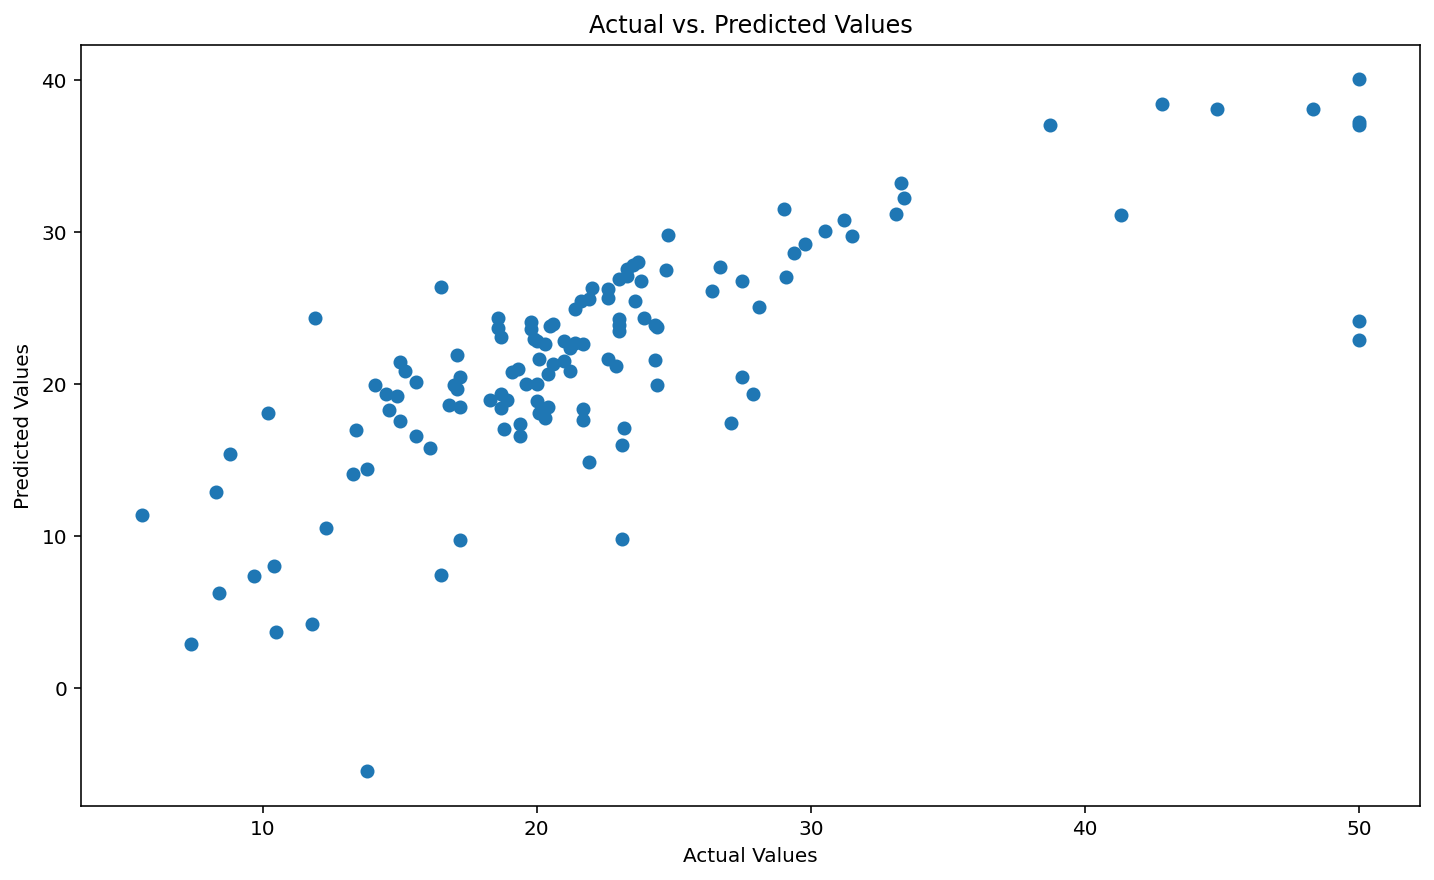

In [88]:
# Generate a plot

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

**Interpret coefficients in the context of the prediction:**
[In the context of prediction, the coefficients represent the relationship between each input variable and the target variable in the regression model.

A positive coefficient suggests that an increase in the corresponding input variable is associated with an increase in the target variable. In contrast, a negative coefficient suggests that an increase in the input variable is associated with a decrease in the target variable.

The magnitude of the coefficient indicates the strength of the relationship. A larger absolute value of the coefficient implies a stronger impact on the target variable.

By examining the coefficients, one can assess which variables have the most significant influence on the prediction outcome.]

